# Imorting libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import openpyxl


In [2]:
file_path = r"C:/Users/Lenovo/OneDrive/Desktop/Customer churn/Data_file.xlsx"

#Sheet name 
sheet_name = 'vw_churndata'

data = pd.read_excel(file_path,sheet_name=sheet_name)

data.head()



,Customer_ID,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Country,State,...,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Satisfaction_Score,Customer_Status,Churn_Label,Churn_Score,CLTV,Churn_Category,Churn_Reason
0,0002-ORFBO,Female,37,No,No,Yes,No,0,United States,California,...,0,381.510010,974.809998,3,Stayed,No,65,2205,Others,Others
1,0003-MKNFE,Male,46,No,No,No,No,0,United States,California,...,10,96.209999,610.280029,5,Stayed,No,66,5414,Others,Others
2,0004-TLHLJ,Male,50,No,No,No,No,0,United States,California,...,0,134.600006,415.450012,1,Churned,Yes,71,4479,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,United States,California,...,0,361.660004,1599.510010,1,Churned,Yes,91,3714,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,United States,California,...,0,22.139999,289.540009,1,Churned,Yes,68,3464,Dissatisfaction,Network reliability


In [3]:
print(data['Customer_Status'].unique())


['Stayed' 'Churned']


In [4]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Under_30', 'Senior_Citizen', 'Married',
       'Dependents', 'Number_of_Dependents', 'Country', 'State', 'City',
       'Zip_Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred_a_friend', 'Number_of_Referrals', 'Tenure_in_Months', 'Offer',
       'Phone_Service', 'Avg_Monthly_Long_Distance_Charges',
       'Internet_Service', 'Internet_Type', 'Avg_Monthly_GB_Download',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Satisfaction_Score', 'Customer_Status', 'Churn_Label',
       'Churn_Score', 'CLTV', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [5]:
#data processing
#Data columns that will not be used for prediction
data=data.drop(['Customer_ID','Zip_Code', 'Latitude', 'Longitude','Churn_Reason', 'State', 'Churn_Label', 'Quarter', 'Avg_Monthly_GB_Download', 'Number_of_Dependents', 'City',
       'Dependents', 'Avg_Monthly_Long_Distance_Charges', 'Population',
       'Internet_Type', 'Offer', 'Online_Security', 'Payment_Method',
       'Senior_Citizen', 'Premium_Tech_Support', 'Paperless_Billing',
       'Internet_Service', 'Referred_a_friend', 'Total_Extra_Data_Charges',
       'Total_Refunds', 'Streaming_Music', 'Streaming_TV', 'Married',
       'Device_Protection_Plan', 'Gender', 'Online_Backup', 'Streaming_Movies',
       'Unlimited_Data', 'Under_30', 'Phone_Service', 'Country', 'Churn_Category'],axis=1)

data_encode = ['Age', 'Contract']

In [6]:
# Encoding categorical values except target values
label_encoders = {}
for column in data_encode:
    # Initialize the LabelEncoder for each column
    label_encoders[column] = LabelEncoder()

    # Apply fit_transform to the column and assign the encoded values back to the DataFrame
    data[column] = label_encoders[column].fit_transform(data[column])

x = data.drop('Customer_Status', axis=1)


In [7]:
# Check unique values in the column
print(data['Customer_Status'].unique())

# Clean the column by stripping spaces and standardizing capitalization
data['Customer_Status'] = data['Customer_Status'].astype(str).str.strip().str.capitalize()

# Map the cleaned column
data['Customer_Status'] = data['Customer_Status'].map({'Churned': 1, 'Stayed': 0})

# Fill unmapped values if necessary
data['Customer_Status'] = data['Customer_Status'].fillna(-1)

# Check if the issue is resolved
print(data['Customer_Status'].head())


['Stayed' 'Churned']
0    0
1    0
2    1
3    1
4    1
Name: Customer_Status, dtype: int64


In [8]:
y = data['Customer_Status']
x

,Age,Number_of_Referrals,Tenure_in_Months,Contract,Monthly_Charge,Total_Charges,Total_Long_Distance_Charges,Total_Revenue,Satisfaction_Score,Churn_Score,CLTV
0,18,2,9,1,65.599998,593.299988,381.510010,974.809998,3,65,2205
1,27,0,9,0,59.900002,542.400024,96.209999,610.280029,5,66,5414
2,31,0,4,0,73.900002,280.850006,134.600006,415.450012,1,71,4479
3,59,1,13,0,98.000000,1237.849976,361.660004,1599.510010,1,91,3714
4,56,3,3,0,83.900002,267.399994,22.139999,289.540009,1,68,3464
...,...,...,...,...,...,...,...,...,...,...,...
6584,17,0,4,0,20.950001,85.500000,8.040000,93.540001,1,85,5822
6585,1,0,13,1,55.150002,742.900024,606.840027,1349.739990,4,59,3161
6586,21,1,22,0,85.099998,1873.699951,356.399994,2230.100098,1,68,5248
6587,2,5,67,2,67.849998,4627.649902,142.039993,4769.689941,3,59,4792


In [9]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training the model

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_model.predict(X_test)
# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

Confusion Matrix:
[[934   1]
 [ 22 361]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       935
           1       1.00      0.94      0.97       383

    accuracy                           0.98      1318
   macro avg       0.99      0.97      0.98      1318
weighted avg       0.98      0.98      0.98      1318



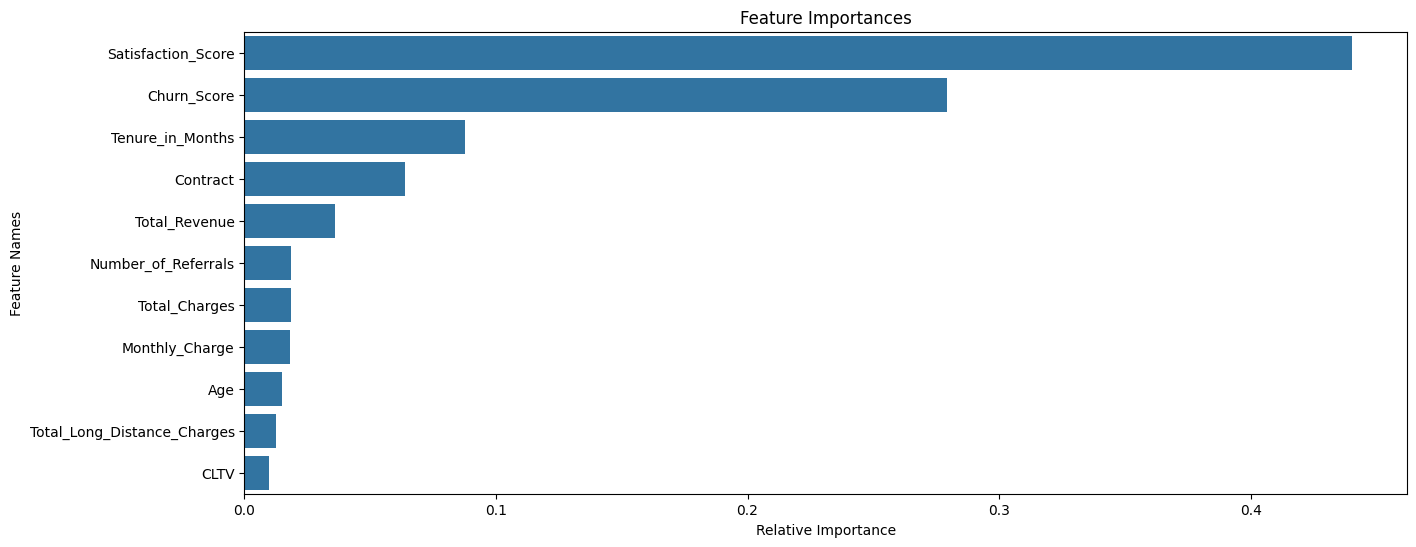

In [12]:
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=x.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [13]:
# Define the path to the Joiner Data Excel file

file_path = r"C:/Users/Lenovo/OneDrive/Desktop/Customer churn/Data_file.xlsx"

 

# Define the sheet name to read data from

sheet_name = 'vw_joineddata'

 

# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)
new_data.head()

,Customer_ID,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Country,State,...,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Satisfaction_Score,Customer_Status,Churn_Label,Churn_Score,CLTV,Churn_Category,Churn_Reason
0,0021-IKXGC,Female,72,No,Yes,No,No,0,United States,California,...,0,7.770000,79.870003,4,Joined,No,50,4432,Others,Others
1,0030-FNXPP,Female,22,Yes,No,No,No,0,United States,California,...,0,9.360000,66.559998,4,Joined,No,59,5634,Others,Others
2,0082-LDZUE,Male,54,No,No,No,No,0,United States,California,...,0,42.950001,87.250000,5,Joined,No,57,4427,Others,Others
3,0139-IVFJG,Female,19,Yes,No,Yes,No,0,United States,California,...,0,9.300000,199.800003,3,Joined,No,29,5361,Others,Others
4,0178-CIIKR,Female,60,No,No,No,No,0,United States,California,...,0,8.070000,66.070000,3,Joined,No,74,5949,Others,Others


In [14]:
# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 

# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

 

# Drop columns that won't be used for prediction in the encoded DataFrame

# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID','Zip_Code', 'Latitude', 'Longitude','Churn_Reason', 'State', 'Churn_Label', 'Quarter', 'Avg_Monthly_GB_Download', 'Number_of_Dependents', 'City',
       'Dependents', 'Avg_Monthly_Long_Distance_Charges', 'Population',
       'Internet_Type', 'Offer', 'Online_Security', 'Payment_Method',
       'Senior_Citizen', 'Premium_Tech_Support', 'Paperless_Billing',
       'Internet_Service', 'Referred_a_friend', 'Total_Extra_Data_Charges',
       'Total_Refunds', 'Streaming_Music', 'Streaming_TV', 'Married',
       'Device_Protection_Plan', 'Gender', 'Online_Backup', 'Streaming_Movies',
       'Unlimited_Data', 'Under_30', 'Phone_Service', 'Country', 'Churn_Category', 'Customer_Status'], axis=1)



In [15]:
new_data.head(2)

,Age,Number_of_Referrals,Tenure_in_Months,Contract,Monthly_Charge,Total_Charges,Total_Long_Distance_Charges,Total_Revenue,Satisfaction_Score,Churn_Score,CLTV
0,72,0,1,One Year,72.099998,72.099998,7.77,79.870003,4,50,4432
1,22,0,3,Month-to-Month,19.850000,57.200001,9.36,66.559998,4,59,5634


In [16]:
# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

In [17]:
# Make predictions

new_predictions = rf_model.predict(new_data)

In [18]:
print(new_predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1]


In [19]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Print average cross-validation score
print(f"Cross-Validation Score: {cv_scores.mean():.4f}")


Cross-Validation Score: 0.9829


In [20]:
# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

In [21]:
# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [22]:
# Save the results

original_data.to_csv(r"C:/Users/Lenovo/OneDrive/Desktop/Customer churn/Predictions.csv", index=False)